# Logarithms & Exponentials


In [3]:
import math

for n in range(0,20):
    print(n, 2**n)
    

0 1
1 2
2 4
3 8
4 16
5 32
6 64
7 128
8 256
9 512
10 1024
11 2048
12 4096
13 8192
14 16384
15 32768
16 65536
17 131072
18 262144
19 524288


Values of x:  [0.1   0.101 0.102 ... 7.997 7.998 7.999]
Values of y:  [-3.32192809 -3.3075728  -3.29335894 ...  2.99945889  2.99963928
  2.99981965]


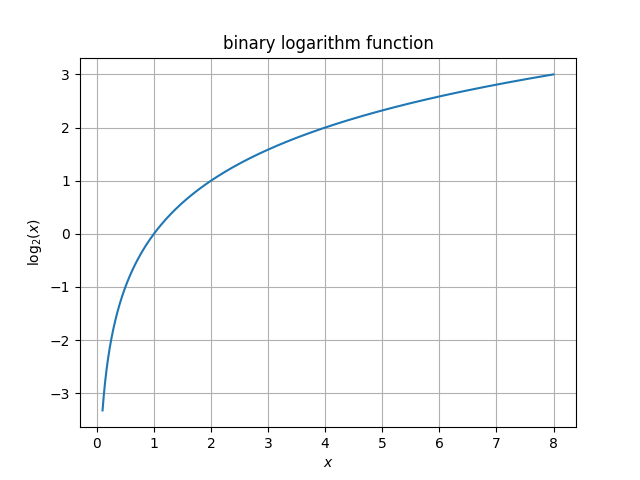

In [20]:
# adapted from https://www.askpython.com/python/examples/plot-mathematical-functions

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.1, 8, 0.001)
y = np.log2(x)
print('Values of x: ', x)
print('Values of y: ', y)
 
plt.plot(x, y)
 
plt.grid(True)
plt.title("binary logarithm function")
plt.xlabel(r"$x$")
plt.ylabel(r"$\log_2(x)$")
plt.show()

Values of x:  [-3.    -2.999 -2.998 ...  2.997  2.998  2.999]
Values of y:  [0.125      0.12508667 0.12517341 ... 7.98338175 7.98891733 7.99445674]


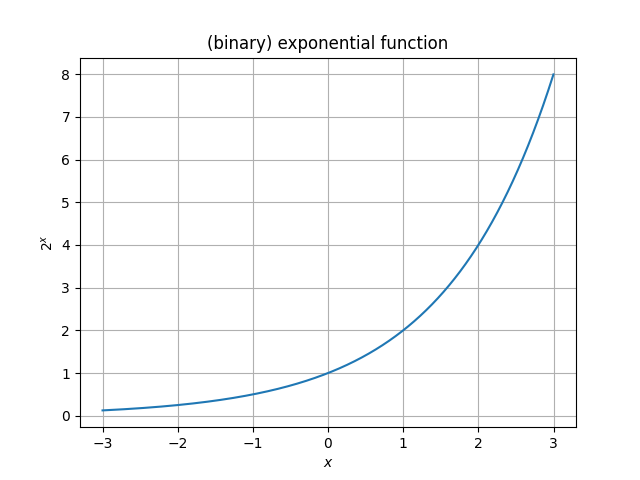

In [21]:
# adapted from https://www.askpython.com/python/examples/plot-mathematical-functions

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)
y = 2**x
print('Values of x: ', x)
print('Values of y: ', y)
 
plt.plot(x, y)
 
plt.grid(True)
plt.title("(binary) exponential function")
plt.xlabel(r"$x$")
plt.ylabel(r"$2^x$")
plt.show()

# Probability Distributions

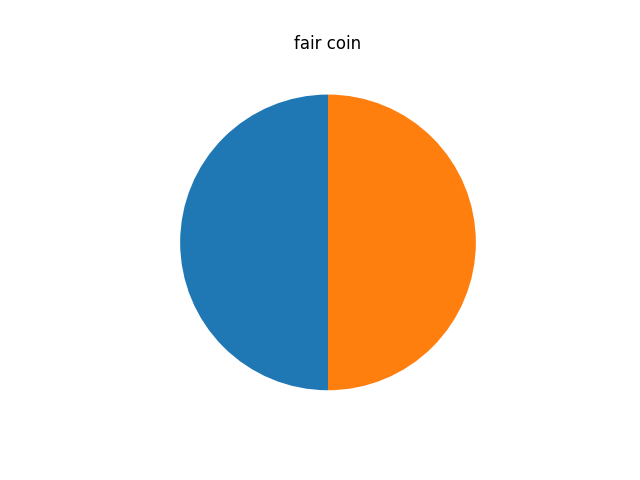

In [26]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([0.5, 0.5])

plt.pie(y, startangle = 90)
plt.title("fair coin")
plt.savefig("fair", transparent=True)
plt.show() 

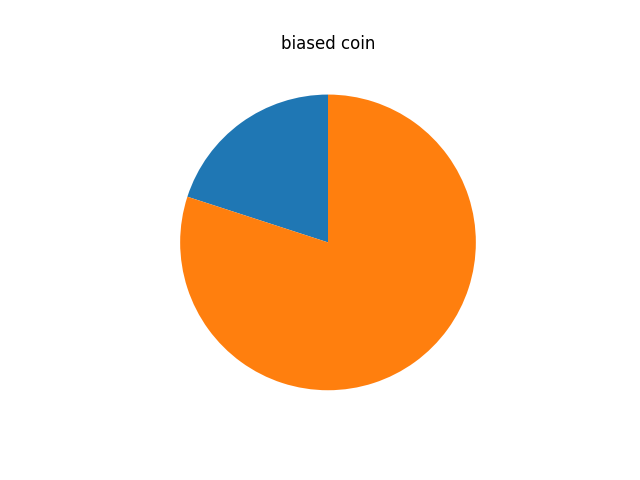

In [24]:
y = np.array([0.2, 0.8])
plt.pie(y, startangle = 90)
plt.title("biased coin")
plt.savefig("biased", transparent=True)
plt.show() 

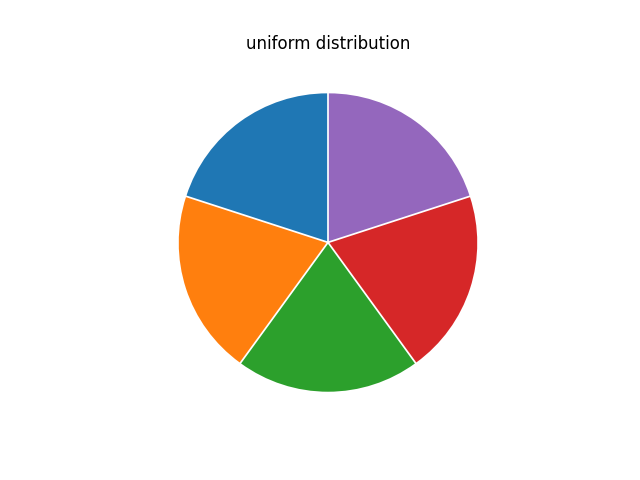

In [25]:
y = np.array([1/5, 1/5, 1/5, 1/5, 1/5])
myexplode = [0.01, 0.01, 0.01, 0.01, 0.01]
plt.pie(y, startangle = 90, explode = myexplode)
plt.title("uniform distribution")
plt.savefig("unif", transparent=True)
plt.show() 


In [30]:
import piplite
await piplite.install('ipywidgets')
from ipywidgets import interactive


In [50]:
# from https://www.geeksforgeeks.org/python-binomial-distribution/
from scipy.stats import binom

def plot_binomial(n=6, p=0.5):
    """Plot the probability mass of a binomial distribution"""

    # defining list of r values
    k_values = list(range(n + 1))
    # list of pmf values
    dist = [binom.pmf(k, n, p) for k in k_values ]
    # plotting the graph 
    plt.bar(k_values, dist)
    plt.xlabel(r"$k$")
    plt.ylabel(r"$\binom{n}{k} p^k (1-p)^{n-k}$")
    plt.title("binomial distribution")
    plt.show()

In [51]:
w=interactive(plot_binomial,n=(0,20),p=(0.0,1.0))
w

interactive(children=(IntSlider(value=6, description='n', max=20), FloatSlider(value=0.5, description='p', max…

In [104]:
def plot_binomial_pie(n=6, p=0.5):
    """Plot the probability mass of a binomial distribution"""

    # defining list of r values
    k_values = list(range(n + 1))
    # list of pmf values
    dist = [binom.pmf(k, n, p) for k in k_values ]
    # plotting the graph 
    plt.pie(dist, labels = k_values, startangle = 90)
    ent = entropy(dist)
    plt.title("binomial distribution with entropy H={:.3f}".format(ent))    
    plt.show()

In [105]:
w=interactive(plot_binomial_pie,n=(0,20),p=(0.0,1.0))
w

interactive(children=(IntSlider(value=6, description='n', max=20), FloatSlider(value=0.5, description='p', max…

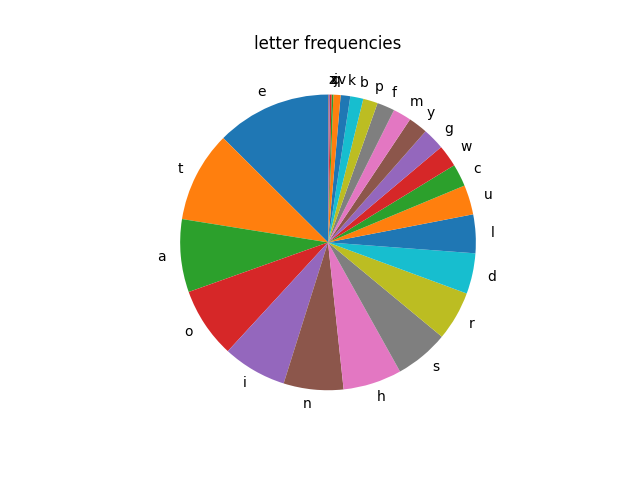

In [159]:
from collections import Counter
import math
import string
import re

## Alice's Adventures in Wonderland: https://www.gutenberg.org/files/11/11-0.txt

## parse input file, convert to lowercase, remove punctuation
with open("Alice_eng.txt") as f:
    data = f.read().lower()
    data = re.sub(r'([^a-z])+', '', data)  # strip everything but the letters

with open("Alice_stripped.txt", 'w') as f:
    f.write(data)
    
count = Counter(data)
total_count = sum(count.values())

letters, letter_freq = zip(*count.most_common())
letter_dist = [x/total_count for x in letter_freq]

plt.pie(letter_freq, labels = letters, startangle = 90)
plt.title("letter frequencies")
plt.savefig("letterfreq", transparent=True)
plt.show()


In [83]:
import piplite
await piplite.install('seaborn')


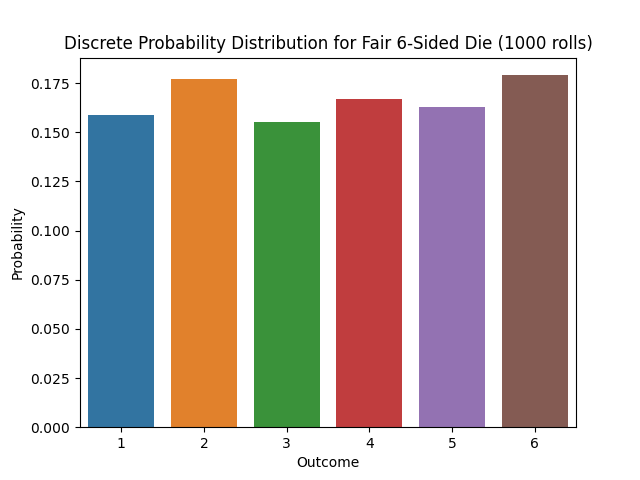

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

NUM_ROLLS = 1000

values = [1, 2, 3, 4, 5, 6]
sample = np.random.choice(values, NUM_ROLLS)

# Numpy arrays containing counts for each side
side, count = np.unique(sample, return_counts=True)
probs = count / len(sample)

# Plot the results
sns.barplot(x=side, y=probs)
plt.title(
    f"Discrete Probability Distribution for Fair 6-Sided Die ({NUM_ROLLS} rolls)")
plt.ylabel("Probability")
plt.xlabel("Outcome")
plt.show()

# Surprisal and Entropy

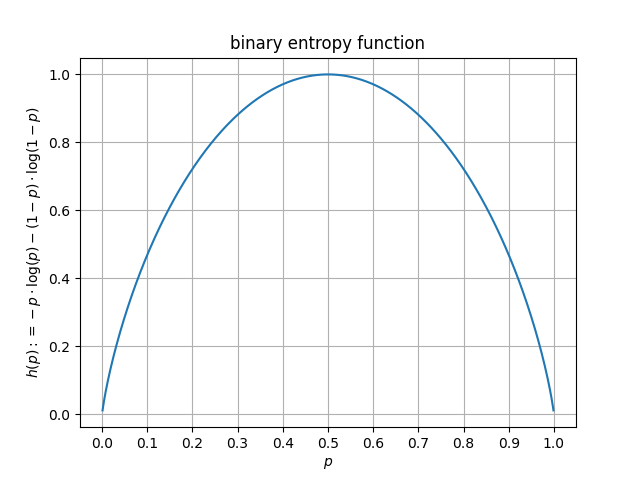

In [96]:
x = np.arange(0, 1, 0.001)
y = -x*np.log2(x) - (1-x)*np.log2(1-x)
plt.plot(x, y)
 
plt.grid(True)
plt.xticks([i/10.0 for i in range(0,11)])
plt.title("binary entropy function")
plt.xlabel(r"$p$")
plt.ylabel(r"$h(p) := -p \cdot \log(p) -(1-p) \cdot \log(1-p)$")
plt.savefig("binaryentropy", transparent=True)
plt.show()

In [99]:
def entropy(prob_dist):
    '''
    :param prob_dist: a list of non-negative floats that sum to 1
    :return: (base 2) Shannon entropy of prob_dist
    '''
    assert(all(p>=0 for p in prob_dist))
    assert(np.isclose(sum(prob_dist),1))

    # https://en.wikipedia.org/wiki/Entropy_%28information_theory%29
    # Shannon entropy H(p_i) = - sum_i p_i * log2(p_i)
    ent = 0.0
    for p in prob_dist:
        ent -= p * np.log2(p)

    return ent
    

# Huffman coding

code from https://favtutor.com/blogs/huffman-coding and https://www.programiz.com/dsa/huffman-coding

In [132]:
from collections import Counter


class NodeTree(object):
    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right

    def children(self):
        return self.left, self.right

    def __str__(self):
        return self.left, self.right


def huffman_code_tree(node, binString=''):
    '''
    Function to find Huffman Code
    '''
    if type(node) is str:
        return {node: binString}
    (l, r) = node.children()
    d = dict()
    d.update(huffman_code_tree(l, binString + '0'))
    d.update(huffman_code_tree(r, binString + '1'))
    return d


def make_tree(nodes):
    '''
    Function to make tree
    :param nodes: Nodes
    :return: Root of the tree
    '''
    while len(nodes) > 1:
        (key1, c1) = nodes[-1]
        (key2, c2) = nodes[-2]
        nodes = nodes[:-2]
        node = NodeTree(key1, key2)
        nodes.append((node, c1 + c2))
        nodes = sorted(nodes, key=lambda x: x[1], reverse=True)
    return nodes[0][0]

In [143]:
def huffman(input):
    count = Counter(input)
    # freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
    node = make_tree(list(count.most_common()))
    encoding = huffman_code_tree(node)

    # compute Shannon entropy of frequency distribution for comparison
    total_count = sum(count.values())
    letters, freq = zip(*count.most_common())
    freq = [x / total_count for x in freq]
    ent = entropy(freq)

    return encoding, "".join([encoding[a] for a in input]), ent


In [145]:
input = 'BCAADDDCCACACAC'
len(input) * 8, len(huffman(input)[1]), huffman(input)[2] * len(input)

(120, 28, 26.72905595320056)

In [151]:
input = data
len(input), len(input) * 8, len(huffman(input)[1]), huffman(input)[2] * len(input), huffman(input)[2]

(123606, 988848, 519188, 515778.37541173544, 4.1727616411156045)

In [154]:
46156*8

369248

In [174]:
letter_samples = "".join(np.random.choice(letters, size=123606, p=letter_dist))
input = letter_samples
len(input), len(input) * 8, len(huffman(input)[1]), huffman(input)[2] * len(input), huffman(input)[2]

(123606, 988848, 519293, 515703.54280363227, 4.172156228691425)

In [175]:
with open("letter_samples.txt", 'w') as f:
    f.write(letter_samples)


In [176]:
73852 *8

590816